In [1]:
import numpy as np
from api.utils.file_utils import traversal_files

files = []
for fnm in traversal_files("/ragflow/input"):
    files.append(fnm)
files

['/ragflow/input/Reflexion Language Agents with Verbal Reinforceme.pdf',
 '/ragflow/input/Training language models to follow instructions.pdf']

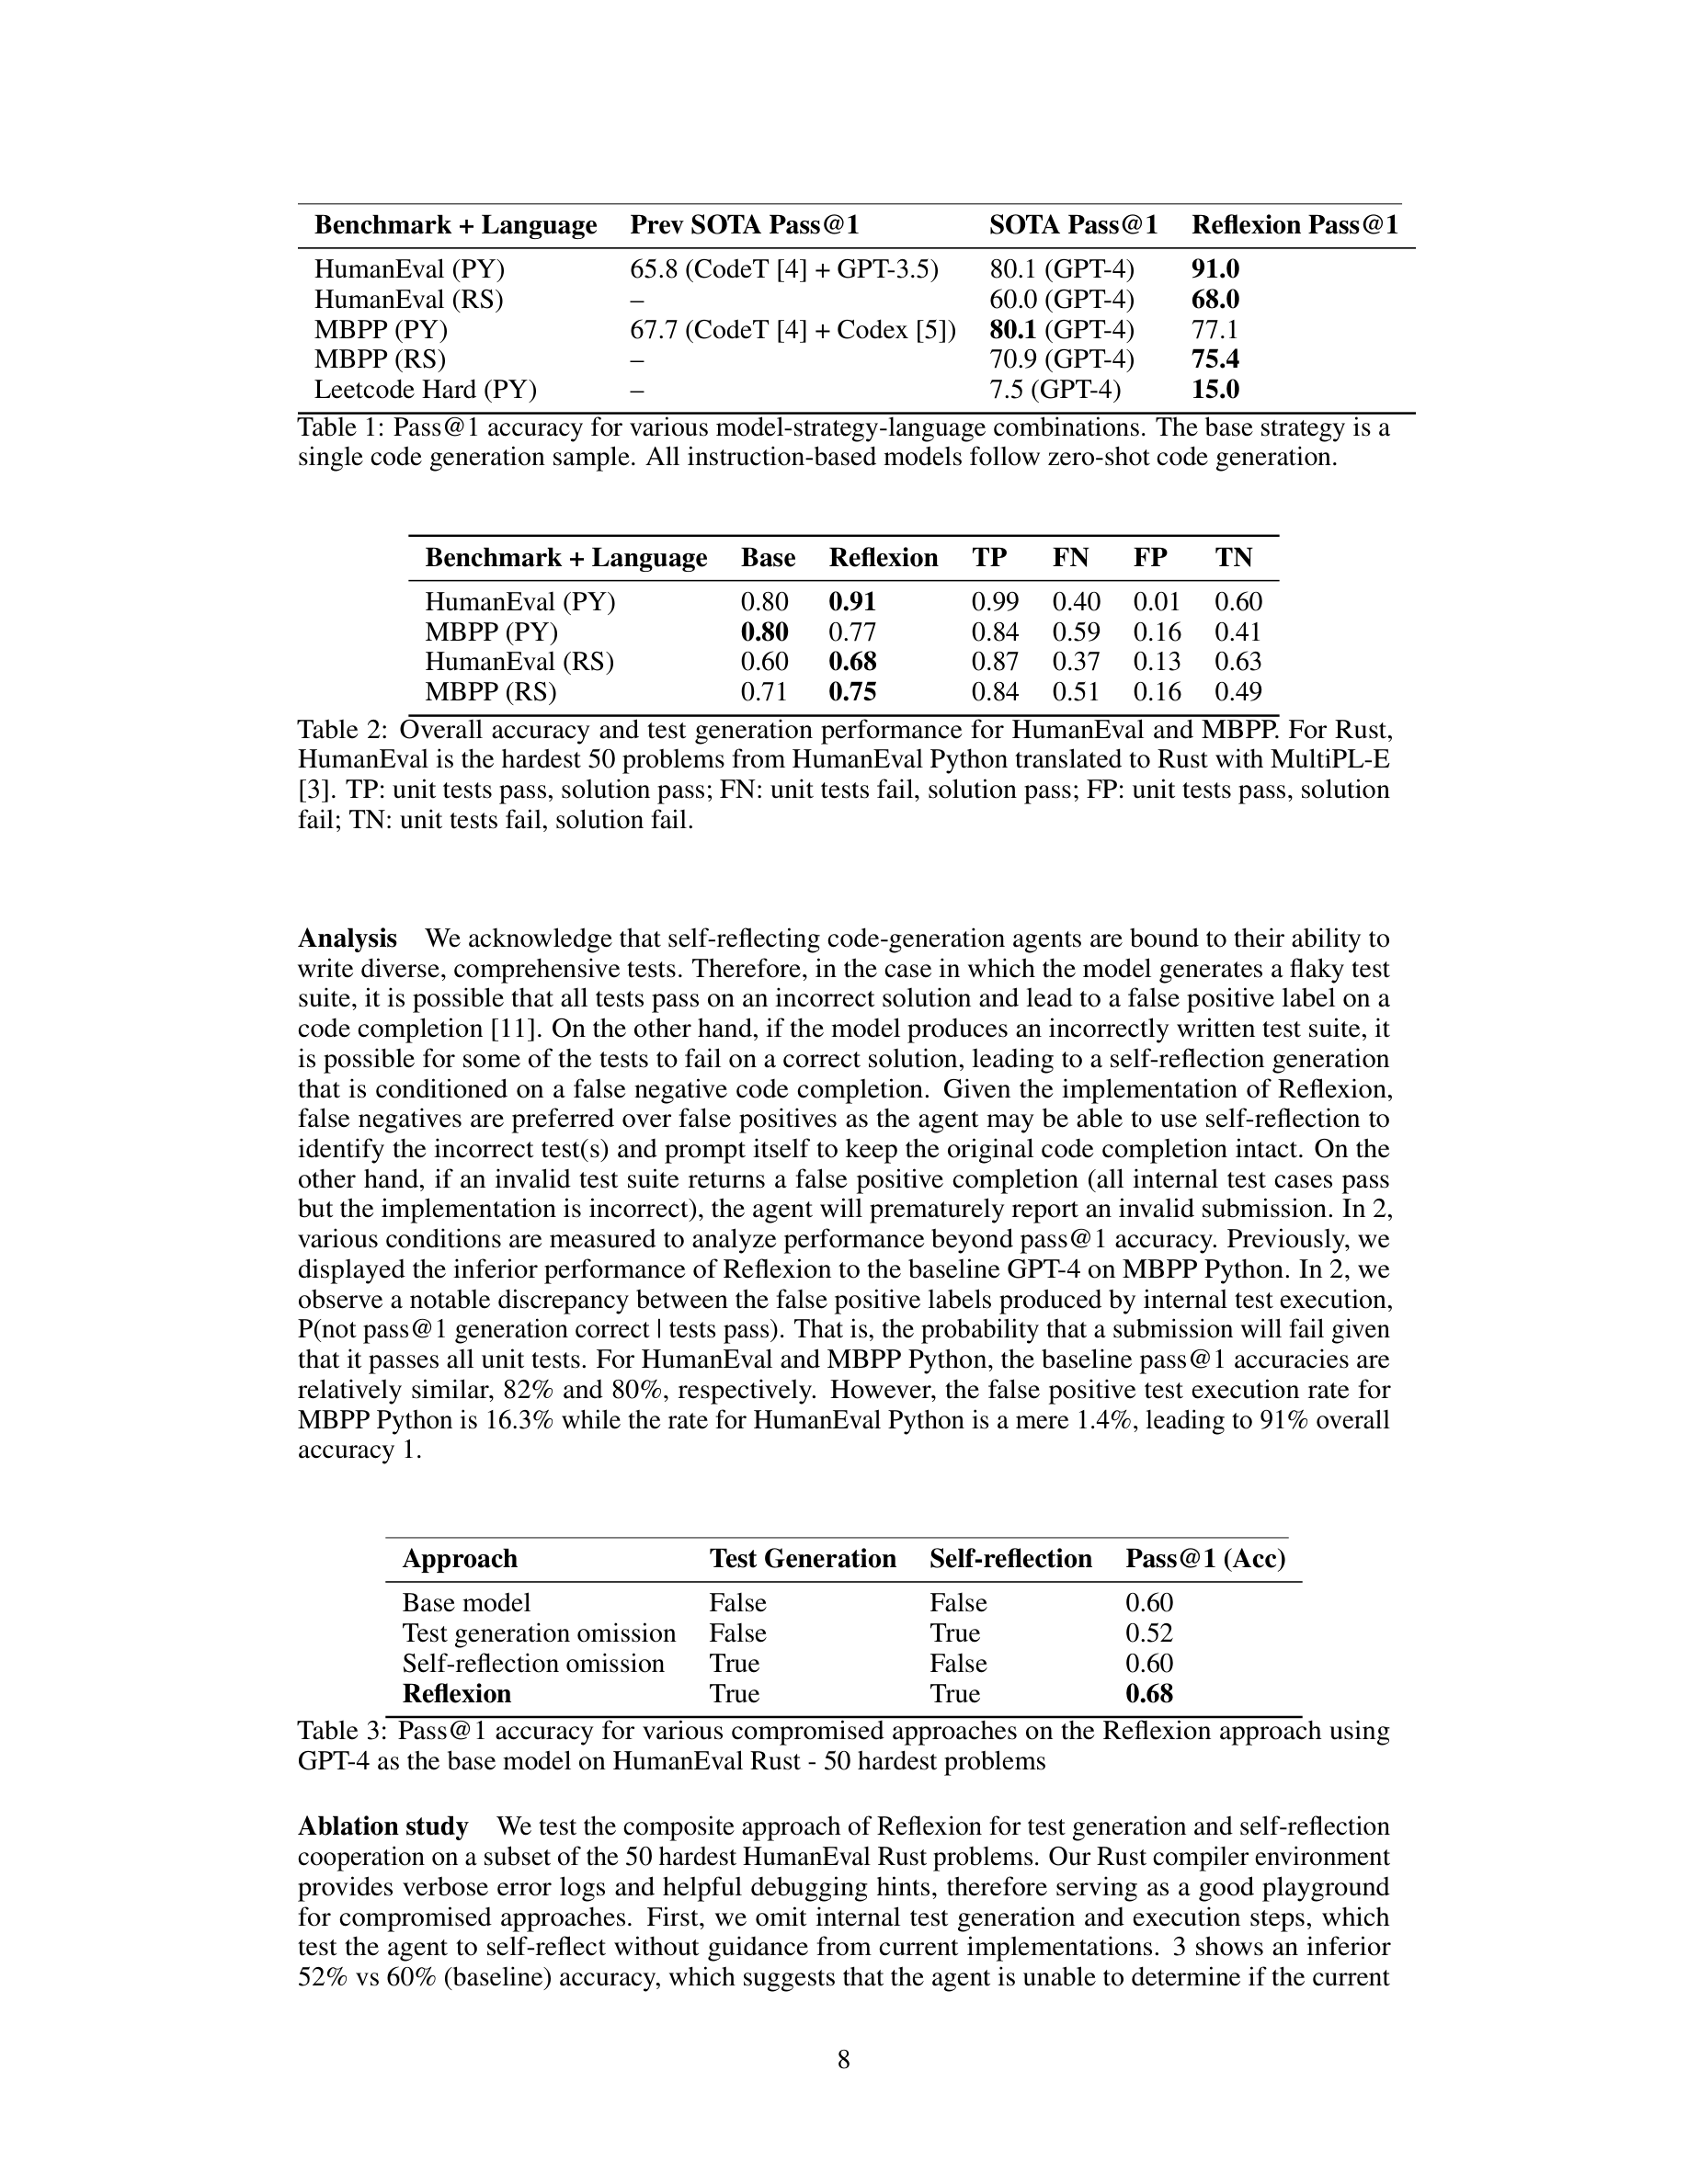

In [7]:
import cv2
import fitz
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

zoomin = 3
mat = fitz.Matrix(zoomin, zoomin)

pdf = fitz.open(files[0])
for i, page in enumerate(pdf):
    pix = page.get_pixmap(matrix=mat)
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    if i == 7:
        break

# show pageN
# cv_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
# plt.figure(figsize=(16,9))
# plt.imshow(cv_image)

img

In [8]:
from deepdoc.vision.seeit import draw_box
from deepdoc.vision import OCR, init_in_out

ocr = OCR()
bxs = ocr(np.array(img))
bxs

Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

[([[332.0, 225.0], [661.0, 230.0], [661.0, 265.0], [332.0, 260.0]],
  ('Benchmark + Language', 0.9867544174194336)),
 ([[676.0, 228.0], [938.0, 228.0], [938.0, 262.0], [676.0, 262.0]],
  ('Prev SOTA Pass@1', 0.9744778275489807)),
 ([[1070.0, 225.0], [1267.0, 228.0], [1267.0, 263.0], [1070.0, 260.0]],
  ('SOTA Pass@1', 0.9892612099647522)),
 ([[1287.0, 225.0], [1527.0, 228.0], [1526.0, 262.0], [1287.0, 260.0]],
  ('Reflexion Pass @1', 0.973080039024353)),
 ([[334.0, 277.0], [554.0, 277.0], [554.0, 312.0], [334.0, 312.0]],
  ('HumanEval (PY)', 0.9996262788772583)),
 ([[681.0, 277.0], [1025.0, 277.0], [1025.0, 309.0], [681.0, 309.0]],
  ('65.8 (CodeT [4] + GPT-3.5)', 0.9796862006187439)),
 ([[1075.0, 280.0], [1237.0, 280.0], [1237.0, 307.0], [1075.0, 307.0]],
  ('80.1 (GPT-4)', 0.9973711371421814)),
 ([[1292.0, 277.0], [1355.0, 277.0], [1355.0, 307.0], [1292.0, 307.0]],
  ('91.0', 0.9999582767486572)),
 ([[339.0, 309.0], [554.0, 309.0], [554.0, 344.0], [339.0, 344.0]],
  ('HumanEval (RS)'

In [9]:
bxs = [(line[0], line[1][0]) for line in bxs]
bxs = [{
    "text": t,
    "bbox": [b[0][0], b[0][1], b[1][0], b[-1][1]],
    "type": "ocr",
    "score": 1} for b, t in bxs if b[0][0] <= b[1][0] and b[0][1] <= b[-1][1]]
bxs

[{'text': 'Benchmark + Language',
  'bbox': [332.0, 225.0, 661.0, 260.0],
  'type': 'ocr',
  'score': 1},
 {'text': 'Prev SOTA Pass@1',
  'bbox': [676.0, 228.0, 938.0, 262.0],
  'type': 'ocr',
  'score': 1},
 {'text': 'SOTA Pass@1',
  'bbox': [1070.0, 225.0, 1267.0, 260.0],
  'type': 'ocr',
  'score': 1},
 {'text': 'Reflexion Pass @1',
  'bbox': [1287.0, 225.0, 1527.0, 260.0],
  'type': 'ocr',
  'score': 1},
 {'text': 'HumanEval (PY)',
  'bbox': [334.0, 277.0, 554.0, 312.0],
  'type': 'ocr',
  'score': 1},
 {'text': '65.8 (CodeT [4] + GPT-3.5)',
  'bbox': [681.0, 277.0, 1025.0, 309.0],
  'type': 'ocr',
  'score': 1},
 {'text': '80.1 (GPT-4)',
  'bbox': [1075.0, 280.0, 1237.0, 307.0],
  'type': 'ocr',
  'score': 1},
 {'text': '91.0',
  'bbox': [1292.0, 277.0, 1355.0, 307.0],
  'type': 'ocr',
  'score': 1},
 {'text': 'HumanEval (RS)',
  'bbox': [339.0, 309.0, 554.0, 344.0],
  'type': 'ocr',
  'score': 1},
 {'text': '60.0 (GPT-4)',
  'bbox': [1075.0, 312.0, 1237.0, 339.0],
  'type': 'ocr'

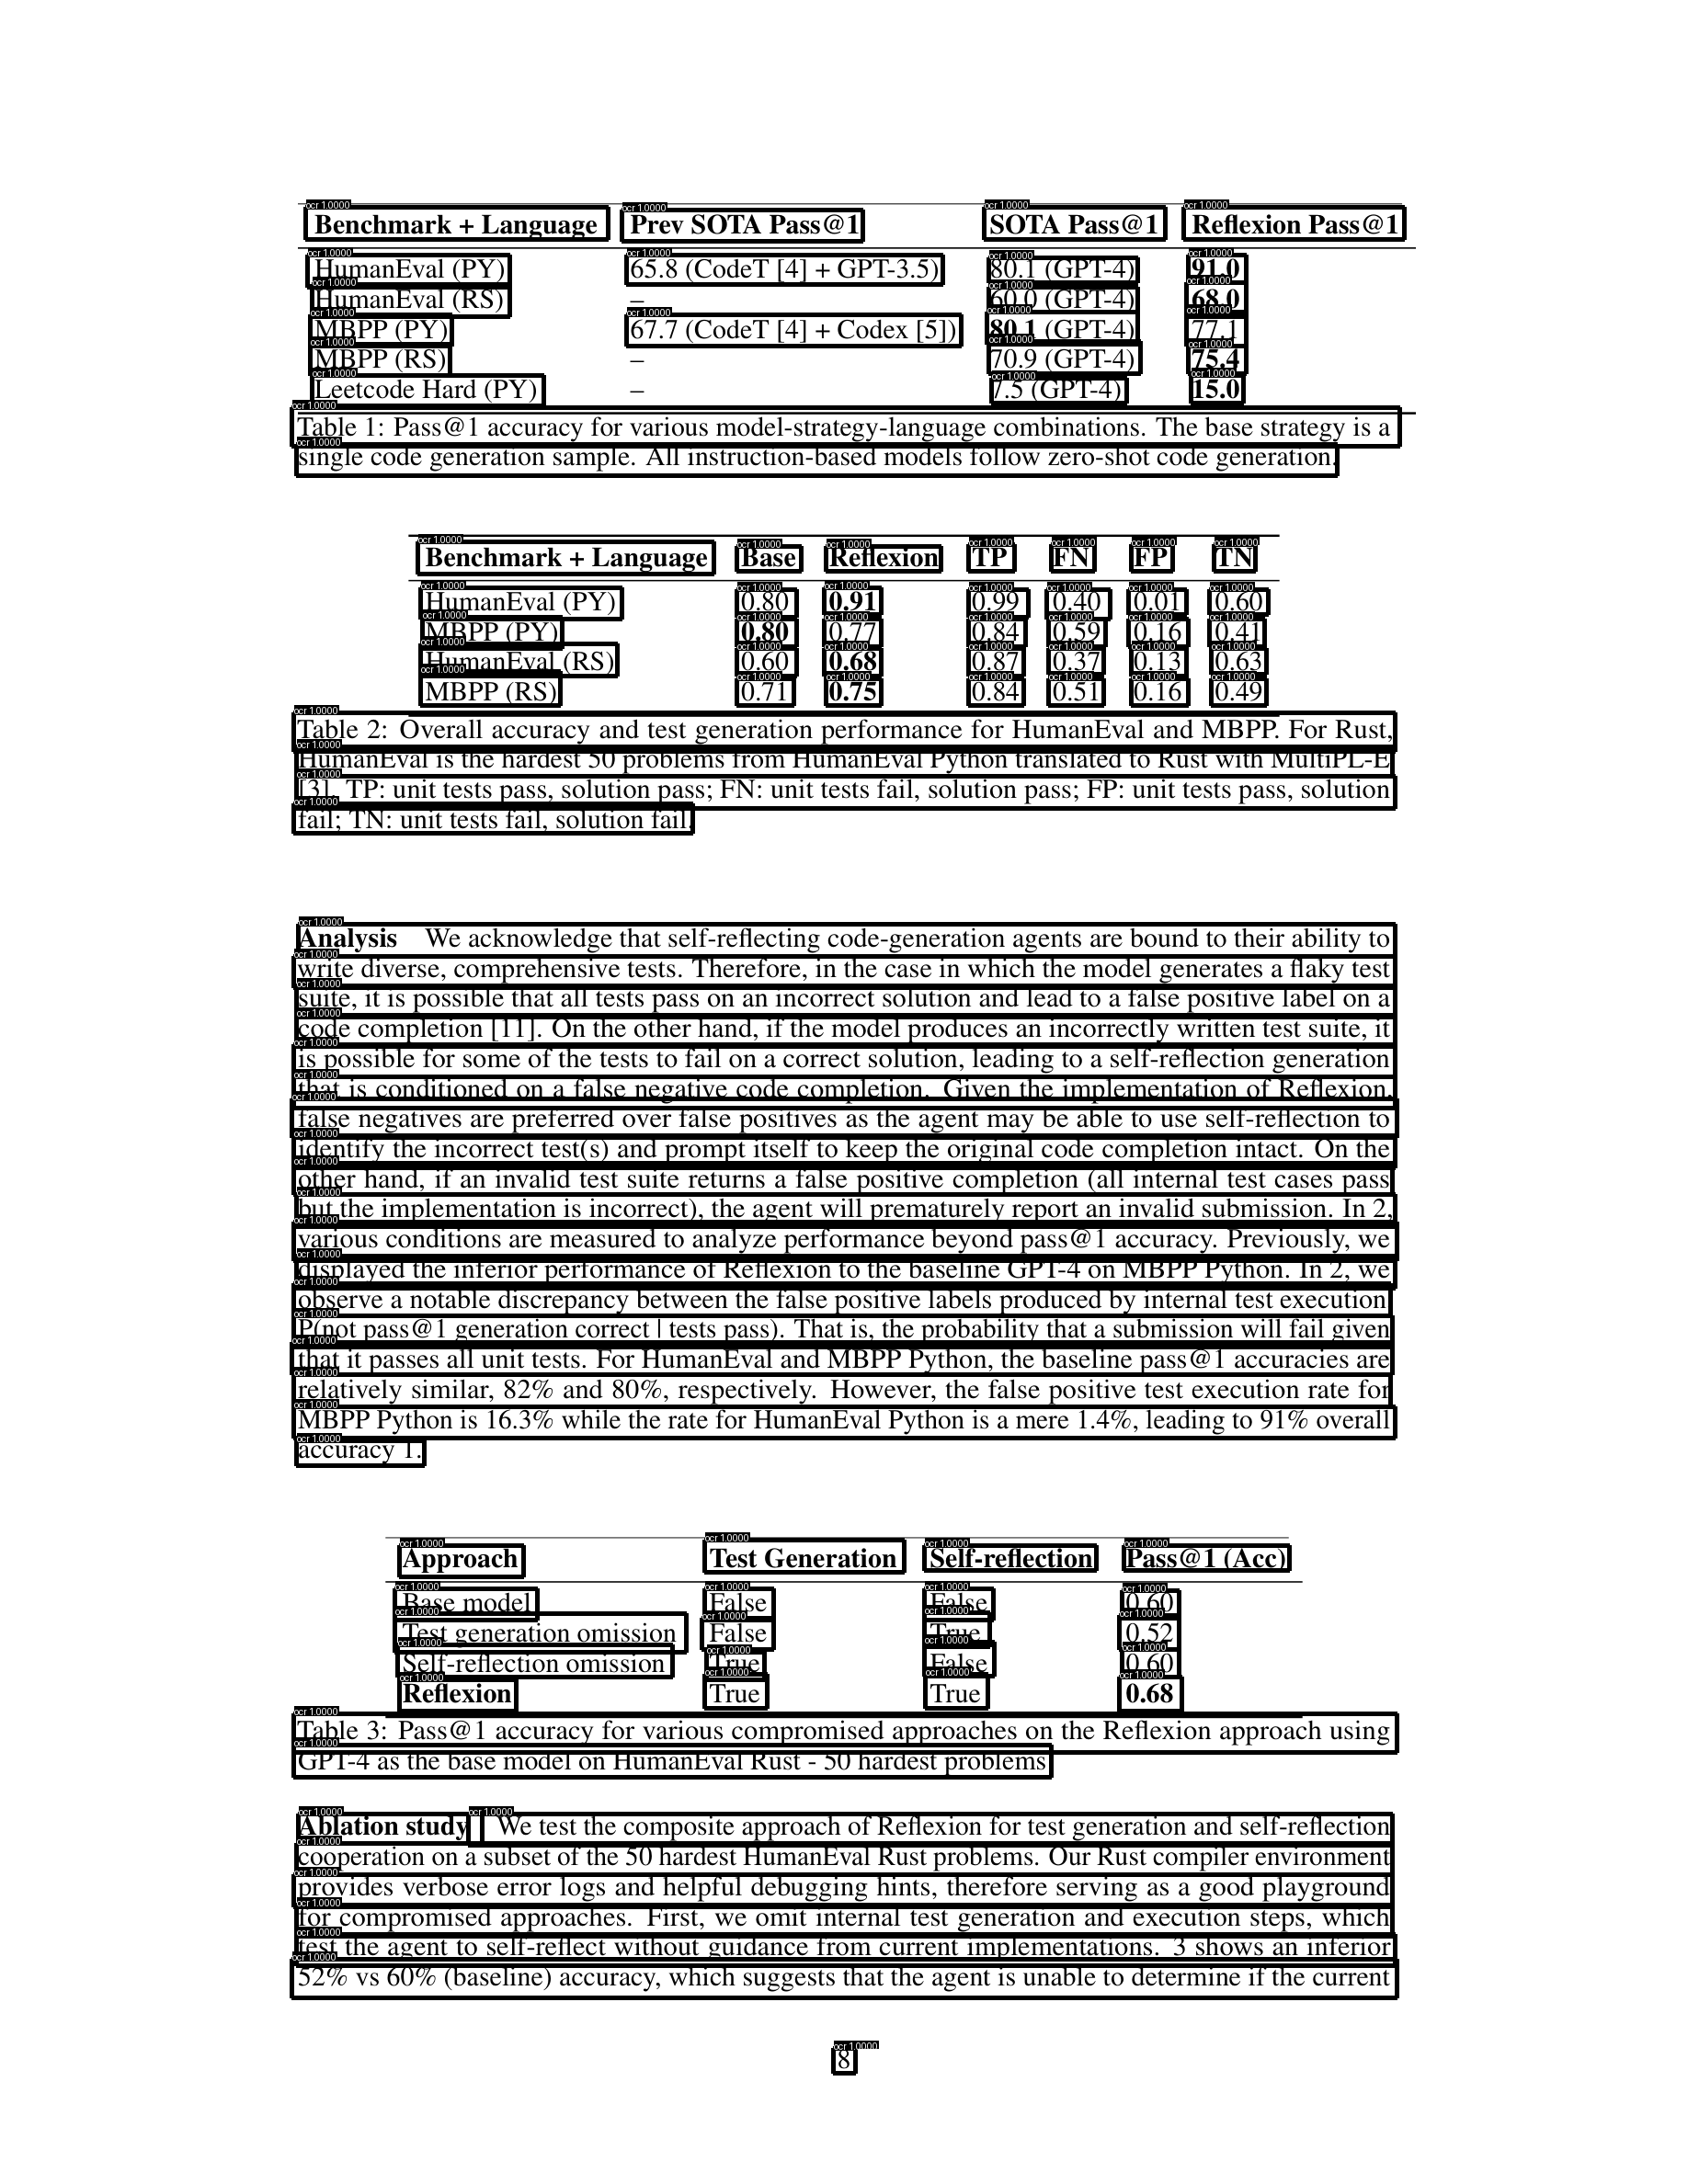

In [10]:
img_draw = draw_box(img, bxs, ["ocr"], 1.)
img_draw

In [11]:
text = "\n".join([o["text"] for o in bxs])
print(text)

Benchmark + Language
Prev SOTA Pass@1
SOTA Pass@1
Reflexion Pass @1
HumanEval (PY)
65.8 (CodeT [4] + GPT-3.5)
80.1 (GPT-4)
91.0
HumanEval (RS)
60.0 (GPT-4)
68.0
MBPP (PY)
67.7 (CodeT [4] + Codex [5])
80.1 (GPT-4)
77.1
MBPP (RS)
70.9 (GPT-4)
75.4
Leetcode Hard (PY)
7.5 (GPT-4)
15.0
Table 1: Pass @ 1 accuracy for various model-strategy-language combinations. The base strategy is a
single code generation sample. All instruction-based models follow zero-shot code generation.
Benchmark + Language
Base
Reflexion
TP
FN
FP
TN
HumanEval (PY)
0.80
0.91
0.99
0.40
0.01
0.60
MBPP (PY)
0.80
0.77
0.84
0.59
0.16
0.41
HumanEval (RS)
0.60
0.68
0.87
0.37
0.13
0.63
MBPP (RS)
0.71
0.75
0.84
0.51
0.16
0.49
Table 2: Overall accuracy and test generation performance for HumanEval and MBPP. For Rust,
HumanEval is the hardest 50 problems from HumanEval Python translated to Rust with MultiPL-E
[3]. TP: unit tests pass, solution pass; FN: unit tests fail, solution pass; FP: unit tests pass, solution
fail; TN: unit